Note: I am not sure if it is needed to have these commands:

! pip install pandas

! pip install numpy

! pip install seaborn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# Load the CSV file into a DataFrame
df = pd.read_csv('./dataset/customer_churn_dataset-training-master.csv')

Gender, Subscription Type, and Contract Length are objects so these will need to be converted to be a numerical value

In [3]:
#Check for null values
nan_count = np.sum(df.isnull(), axis=0)
nan_count

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [4]:
row_nan_count = np.sum(df.isnull(), axis=1)
row_nan_count

0         0
1         0
2         0
3         0
4         0
         ..
440828    0
440829    0
440830    0
440831    0
440832    0
Length: 440833, dtype: int64

After looking through the dataset, row 199295 has missing values for all the columns. Therefore, we can remove this row.

In [5]:
df.iloc[199295]

CustomerID           NaN
Age                  NaN
Gender               NaN
Tenure               NaN
Usage Frequency      NaN
Support Calls        NaN
Payment Delay        NaN
Subscription Type    NaN
Contract Length      NaN
Total Spend          NaN
Last Interaction     NaN
Churn                NaN
Name: 199295, dtype: object

In [6]:
#Drop row 199295
df.drop(199295, inplace=True)

In [7]:
#Ensure that row 199295 was removed
df.iloc[199295]

CustomerID           204107.0
Age                      36.0
Gender                 Female
Tenure                   46.0
Usage Frequency          24.0
Support Calls             7.0
Payment Delay             1.0
Subscription Type       Basic
Contract Length       Monthly
Total Spend             118.9
Last Interaction         27.0
Churn                     1.0
Name: 199296, dtype: object

In [8]:
#Recheck for null values
nan_count = np.sum(df.isnull(), axis=0)
nan_count

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [9]:
#List the different values for the columns with object type
print(df['Gender'].unique())
print(df['Subscription Type'].unique())
print(df['Contract Length'].unique())


['Female' 'Male']
['Standard' 'Basic' 'Premium']
['Annual' 'Monthly' 'Quarterly']


In [10]:
#Perform one-hot encoding
df_gender = pd.get_dummies(df['Gender'], prefix='Gender')
df = df.join(df_gender)
df.drop(columns='Gender', inplace=True)

df_subscription_type = pd.get_dummies(df['Subscription Type'], prefix='Subscription Type')
df = df.join(df_subscription_type)
df.drop(columns='Subscription Type', inplace=True)

df_contract_length = pd.get_dummies(df['Contract Length'], prefix='Contract Length')
df = df.join(df_contract_length)
df.drop(columns='Contract Length', inplace=True)

We can now look at just the data of users of ages greater than 50.

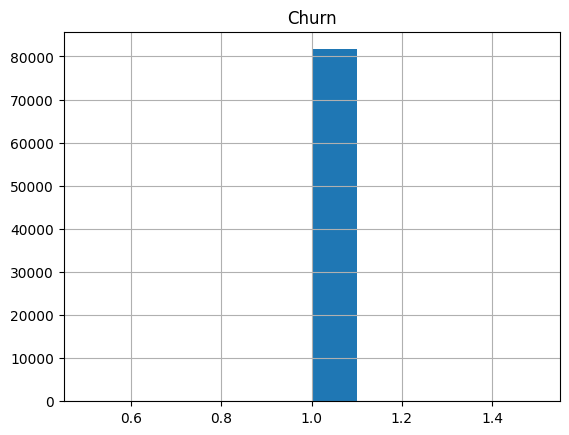

In [11]:
filter_df = df[df['Age']>50]

filter_df
filter_df.hist(column='Churn')

df = filter_df

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>],
       [<Axes: title={'center': 'Usage Frequency'}>,
        <Axes: title={'center': 'Support Calls'}>,
        <Axes: title={'center': 'Payment Delay'}>],
       [<Axes: title={'center': 'Total Spend'}>,
        <Axes: title={'center': 'Last Interaction'}>,
        <Axes: title={'center': 'Churn'}>]], dtype=object)

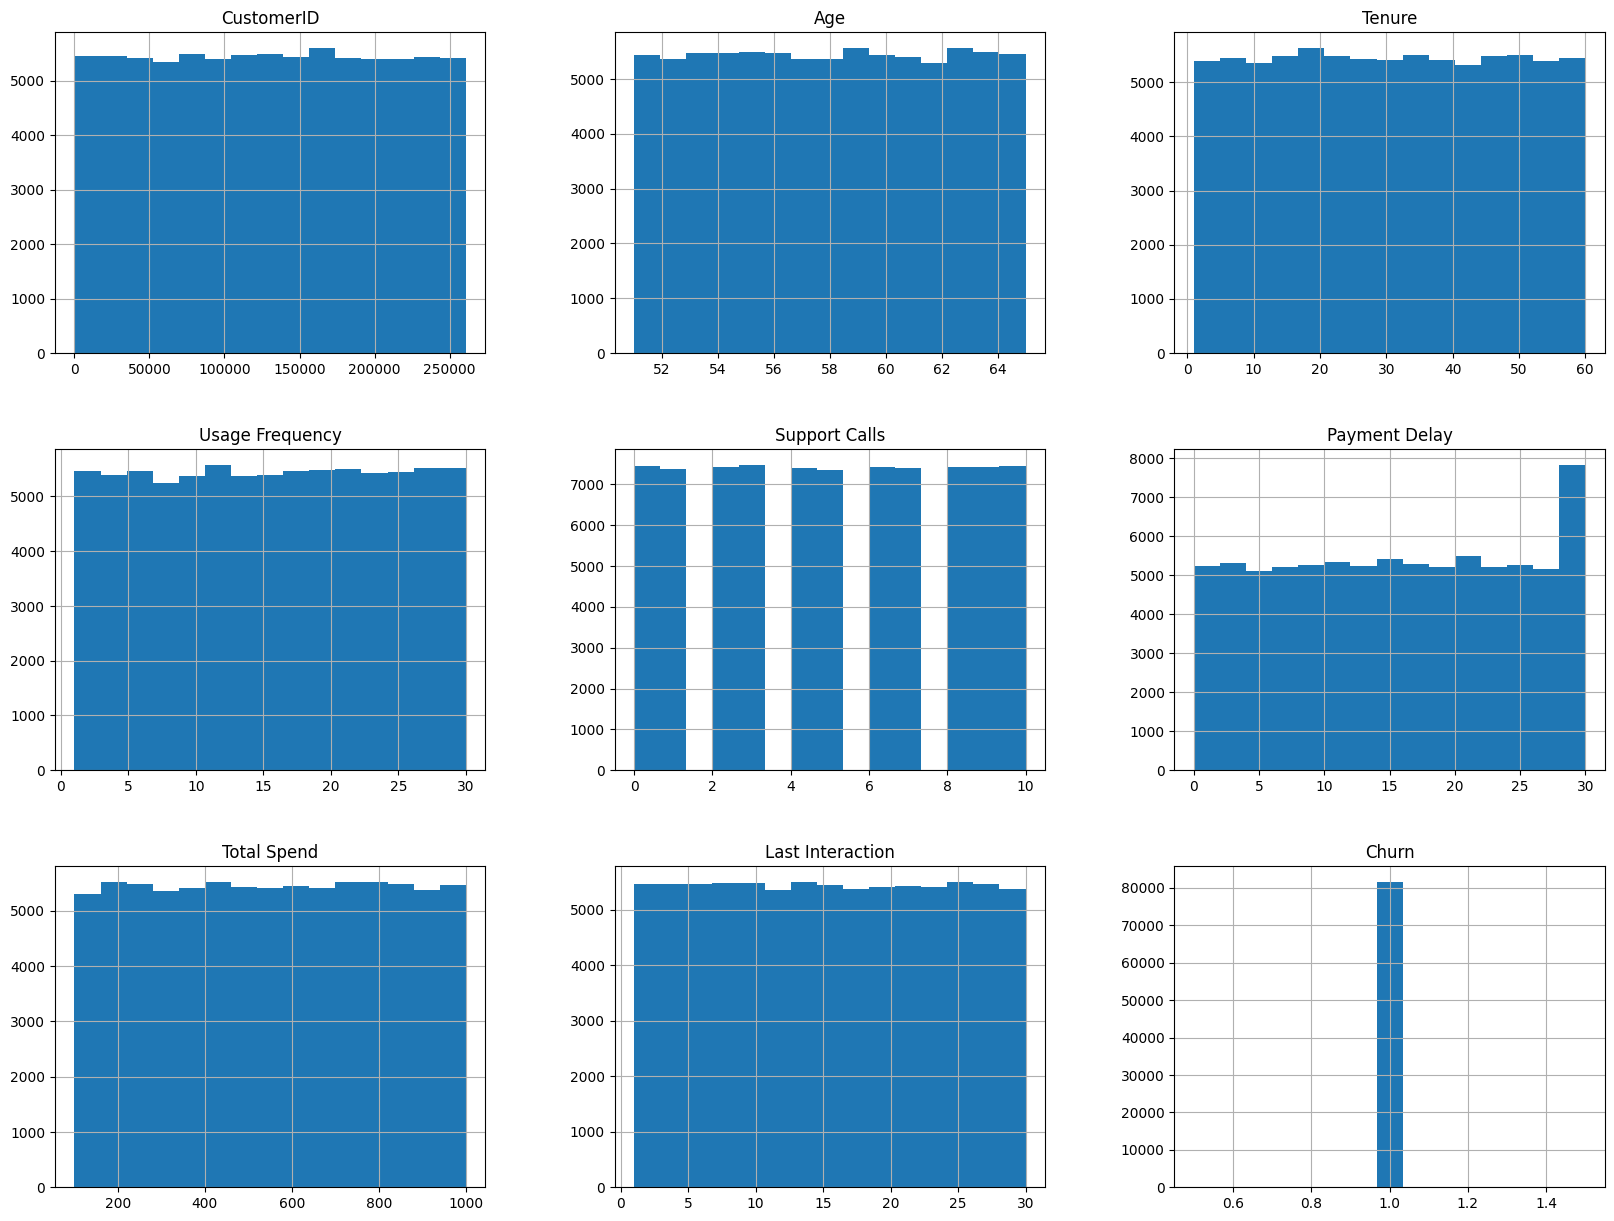

In [12]:
df.hist(bins=15, figsize=(20,15))

<Axes: xlabel='Age', ylabel='Churn'>

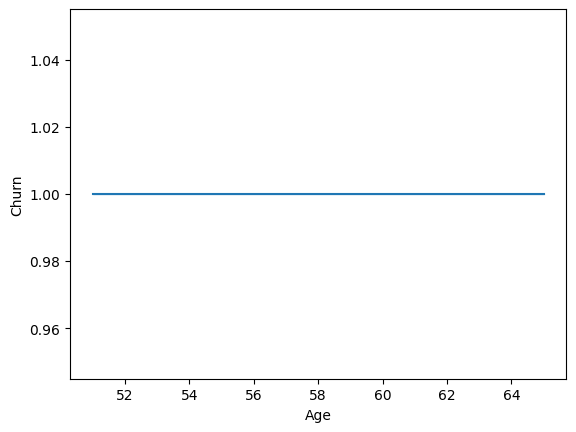

In [13]:
sns.lineplot(x=df['Age'], y=df['Churn'])

In [14]:
df.columns

Index(['CustomerID', 'Age', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn',
       'Gender_Female', 'Gender_Male', 'Subscription Type_Basic',
       'Subscription Type_Premium', 'Subscription Type_Standard',
       'Contract Length_Annual', 'Contract Length_Monthly',
       'Contract Length_Quarterly'],
      dtype='object')

In [15]:
#Recheck data types
df.dtypes

CustomerID                    float64
Age                           float64
Tenure                        float64
Usage Frequency               float64
Support Calls                 float64
Payment Delay                 float64
Total Spend                   float64
Last Interaction              float64
Churn                         float64
Gender_Female                    bool
Gender_Male                      bool
Subscription Type_Basic          bool
Subscription Type_Premium        bool
Subscription Type_Standard       bool
Contract Length_Annual           bool
Contract Length_Monthly          bool
Contract Length_Quarterly        bool
dtype: object

In [16]:
#Identifying correlations with the label
corr_matrix = round(df.corr(),5)
corrs = corr_matrix['Churn']
corrs_sorted = corrs.sort_values(ascending=False)
corrs_sorted

CustomerID                   NaN
Age                          NaN
Tenure                       NaN
Usage Frequency              NaN
Support Calls                NaN
Payment Delay                NaN
Total Spend                  NaN
Last Interaction             NaN
Churn                        NaN
Gender_Female                NaN
Gender_Male                  NaN
Subscription Type_Basic      NaN
Subscription Type_Premium    NaN
Subscription Type_Standard   NaN
Contract Length_Annual       NaN
Contract Length_Monthly      NaN
Contract Length_Quarterly    NaN
Name: Churn, dtype: float64

In [17]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,81654.000000,81654.000000,81654.000000,81654.000000,81654.000000,81654.000000,81654.00000,81654.000000,81654.0
mean,130403.371360,58.006785,30.486516,15.547579,5.000416,15.005829,550.32227,15.483259,1.0
std,75203.935486,4.322167,17.297856,8.664044,3.165146,8.915681,259.40623,8.661047,0.0
min,3.000000,51.000000,1.000000,1.000000,0.000000,0.000000,100.00000,1.000000,1.0
25%,65422.500000,54.000000,16.000000,8.000000,2.000000,7.000000,326.00000,8.000000,1.0
50%,130634.500000,58.000000,30.000000,16.000000,5.000000,15.000000,550.00000,15.000000,1.0
75%,195435.500000,62.000000,46.000000,23.000000,8.000000,23.000000,775.00000,23.000000,1.0
max,260805.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.00000,30.000000,1.0


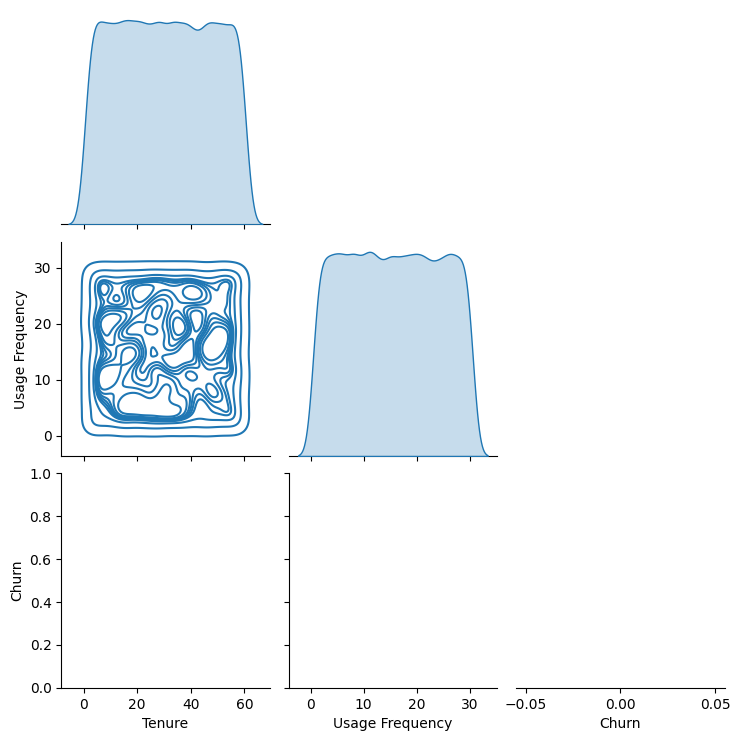

In [18]:
#Visualize the top two correlated features
df_sample = df.sample(n=30000)
top_two_corr = list(corrs_sorted[2:4].index)
df_corrs_sample = df_sample[top_two_corr].copy()
df_corrs_sample['Churn'] = df_sample['Churn']
sns.pairplot(data=df_corrs_sample, kind='kde', corner=True)
#ASK TA about this

^Note: We had to use a sample because using the whole dataset was too large and causing no output

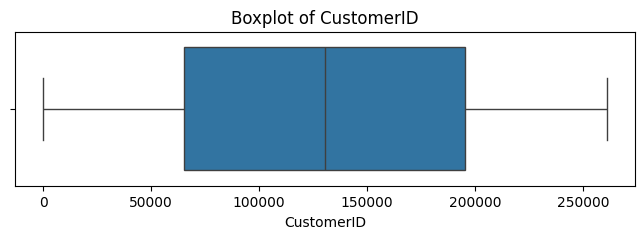

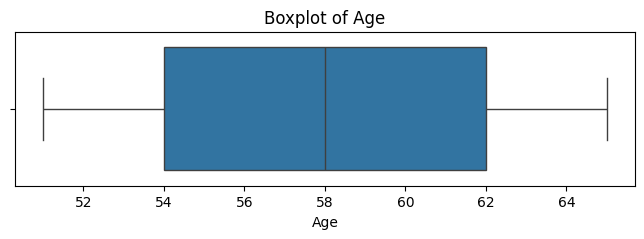

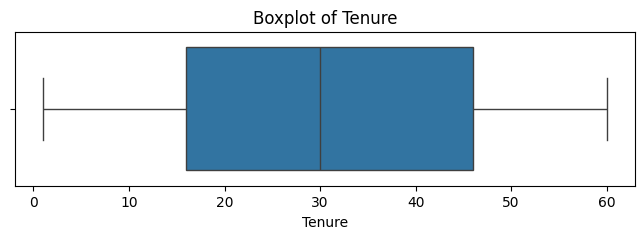

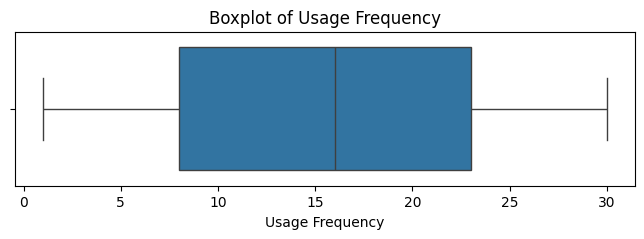

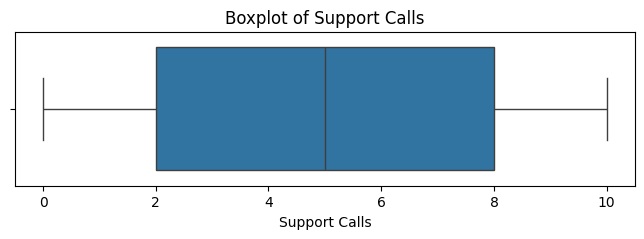

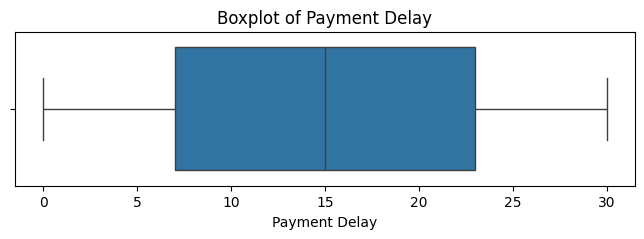

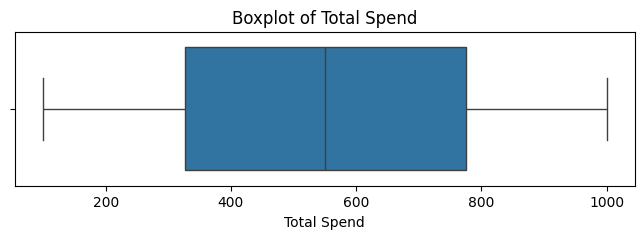

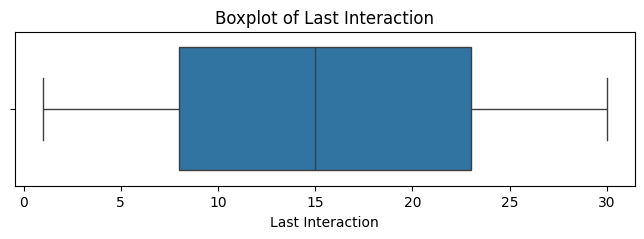

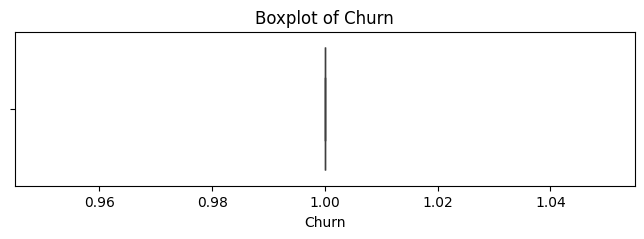

In [19]:
#Create a boxplot for every numerical column to identify outliers
numerical_columns = df.select_dtypes(include='float64').columns

for column in numerical_columns:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

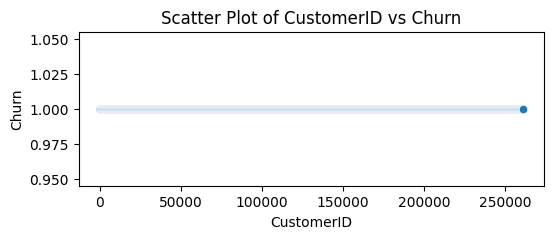

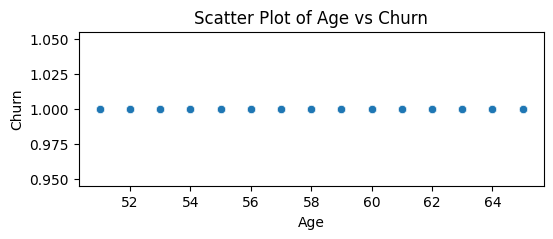

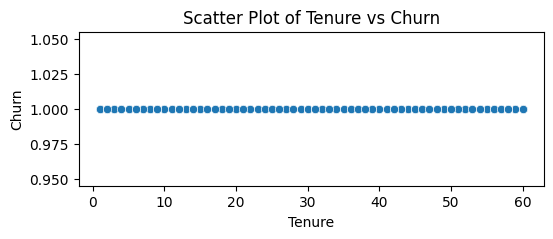

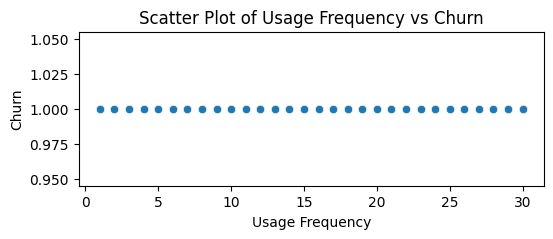

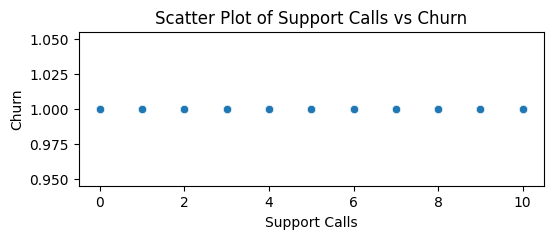

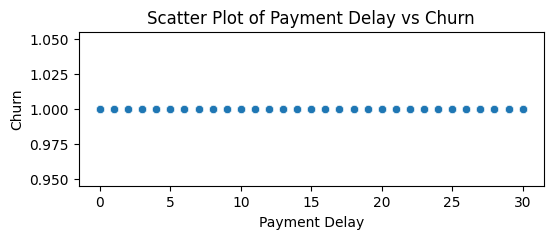

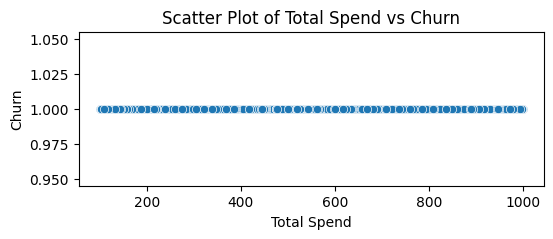

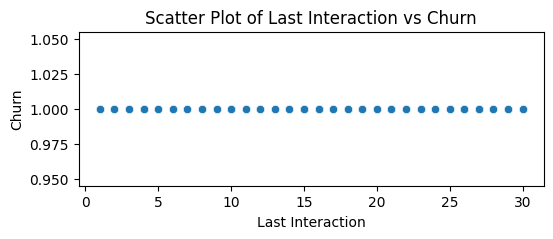

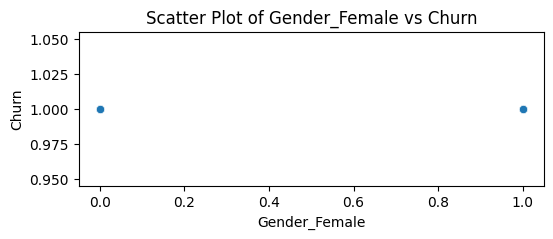

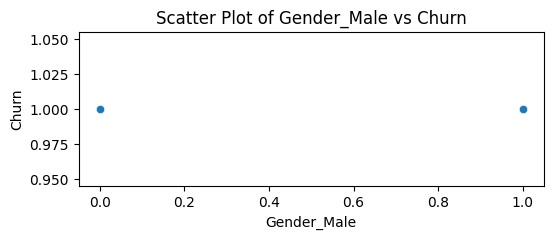

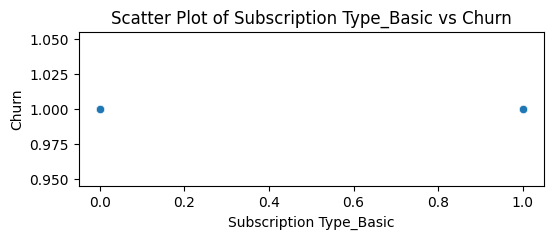

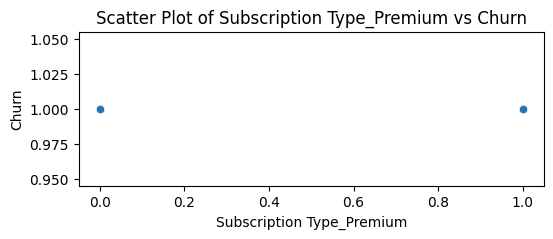

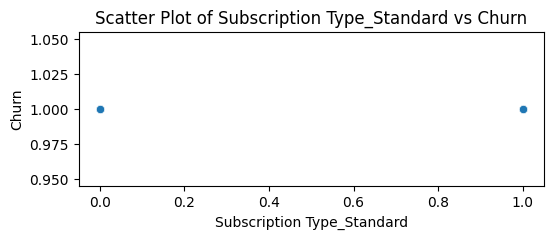

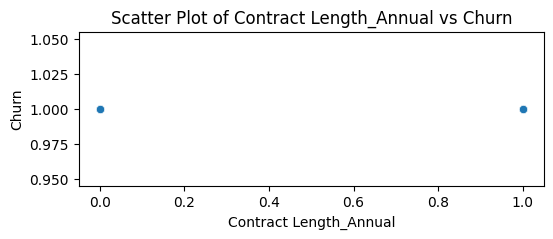

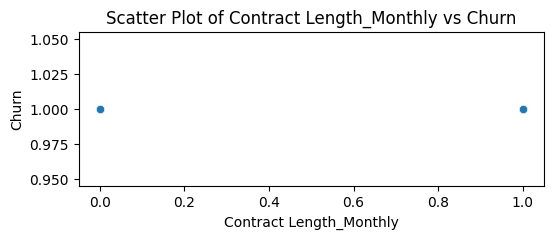

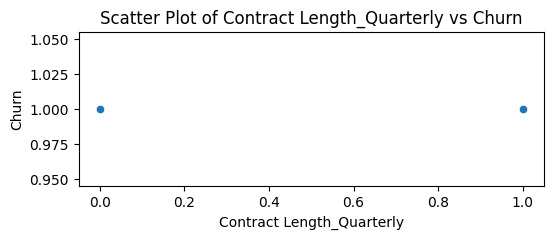

In [20]:
#Create a scatterplot to visualize the relationship between each column and the label
features = df.columns[df.columns != 'Churn']

for feature in features:
    plt.figure(figsize=(6, 2))
    sns.scatterplot(x=df[feature], y=df['Churn'])
    plt.title(f'Scatter Plot of {feature} vs Churn')
    plt.xlabel(feature)
    plt.ylabel('Churn')
    plt.show()


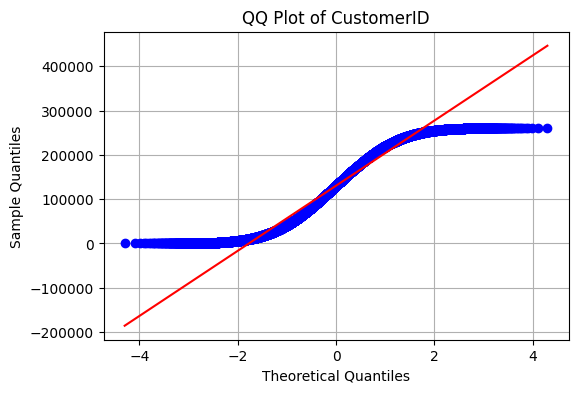

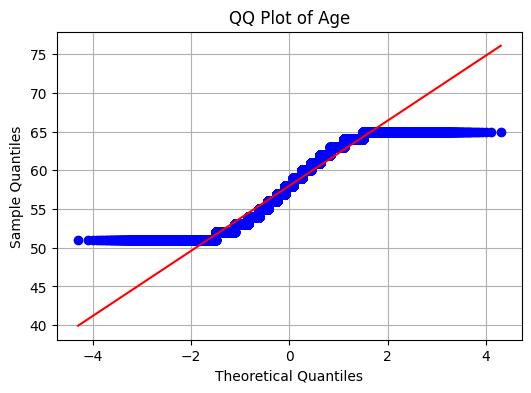

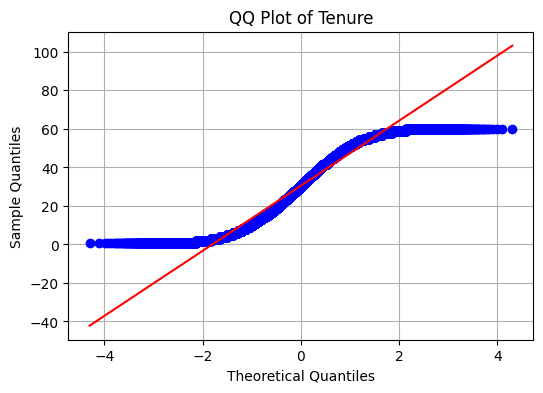

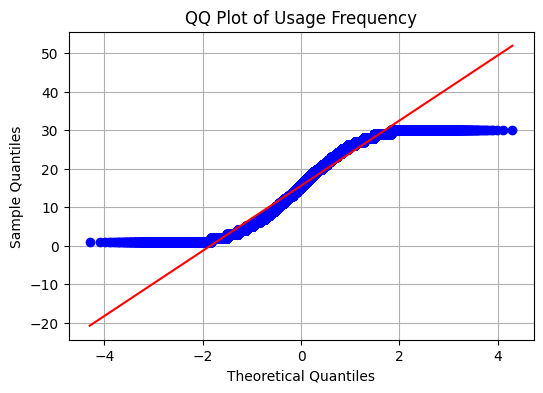

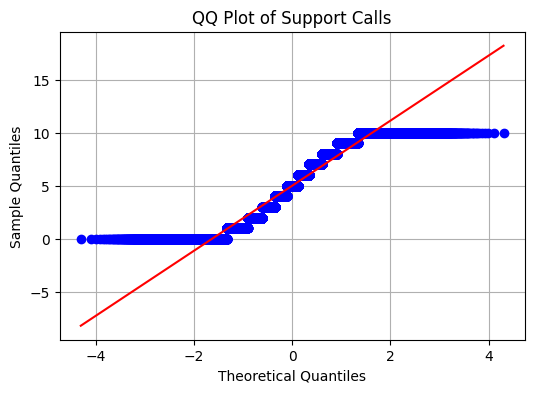

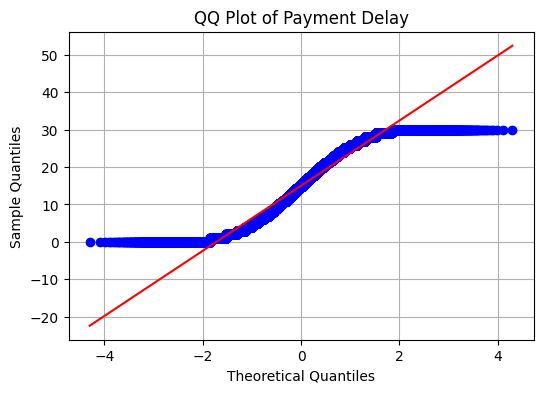

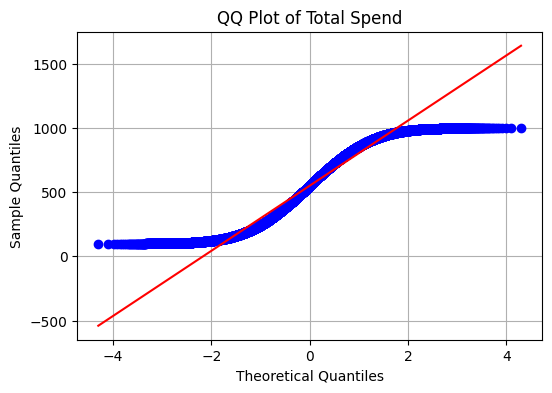

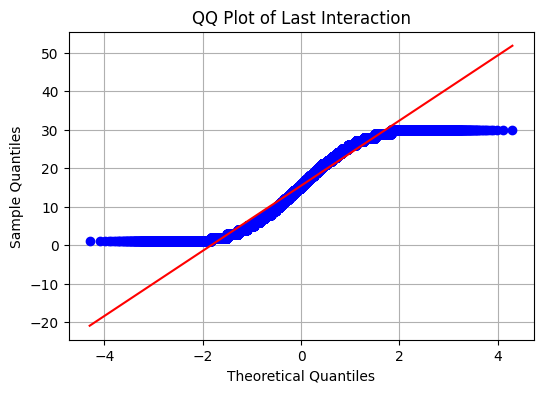

In [21]:
#Create a QQ Plot to determine if each numerical column has a normal distribution
numerical_columns = df.select_dtypes(include='float64').columns
numerical_columns_list = list(numerical_columns)
numerical_columns_list.remove('Churn')
numerical_columns = pd.Index(numerical_columns_list)

for feature in numerical_columns:
    plt.figure(figsize=(6, 4))
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.title(f'QQ Plot of {feature}')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.grid(True)
    plt.show()


From the QQ plots, the numerical columns have less of a straight line curve and more of a cube root curve. This indicates that the columns do not have a normal distribution and will need to be transformed ?